# Prepare data for object detection training 



In [228]:
import sys
import os
import re
import cv2
import time
import numpy as np
import pandas as pd
import copy

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.display import display

## RetinaNet object detection 


Data preparation for training RetinaNet Object detection can be found [here](https://www.kaggle.com/code/jainamshah17/gwd-retinanet-pytorch-train/notebook). 

In [257]:
def open_folder(folder): 
    
    files = []
    
    path = os.path.join(os.getcwd(), folder)

    for file in os.listdir(path):
        files.append(file)
        
    return files

def open_csv(file): 
    
    df = pd.read_csv(file)
    
    return df

def recreate_df(dataframe): 
    
    recreated_df = dataframe.rename(columns={"filename": "image_id"})
    
    # Rename columns
    recreated_df['x'] = recreated_df['xmin']
    recreated_df['y'] = recreated_df['ymin'] 
    recreated_df['w'] = recreated_df['xmax'] - recreated_df['xmin']
    recreated_df['h'] = recreated_df['ymax'] - recreated_df['ymin']
    
    # Delete old columns
    del(recreated_df['xmin'])
    del(recreated_df['xmax'])
    del(recreated_df['ymin'])
    del(recreated_df['ymax'])
    
    return recreated_df

def convert_data(folder): 
    
    dataframes = []
    files = open_annotations(folder)
    
    for i, filename in enumerate(files):
        if filename.split(".")[-1] == "csv": 
            
            df_ = open_csv(os.path.join(os.getcwd(), folder, filename))
            df_ = recreate_df(df_)
            if (i == 0):
                df_all = copy.deepcopy(df_)
            else: 
                df_all = df_all.append(copy.deepcopy(df_))
            #display(df_all)
    
    show = True
    if show:
        display(df_all)
    
    return df_all
                            
        

,image_id,width,height,class,id,x,y,w,h
0,4.jpg,480,480,SmallDryBagHandle,5,46,164,17,15
1,4.jpg,480,480,LargeDryBoxHandles,3,297,0,36,15
2,4.jpg,480,480,LargeDryBoxHandles,3,213,126,92,104
0,1.jpg,480,480,LargeDryBoxHandles,3,0,0,480,445
0,0.jpg,480,480,LargeDryBoxHandles,3,0,156,330,254
0,3.jpg,480,480,LargeDryBoxHandles,3,165,119,293,285
0,2.jpg,480,480,LargeDryBoxHandles,3,0,1,421,422


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


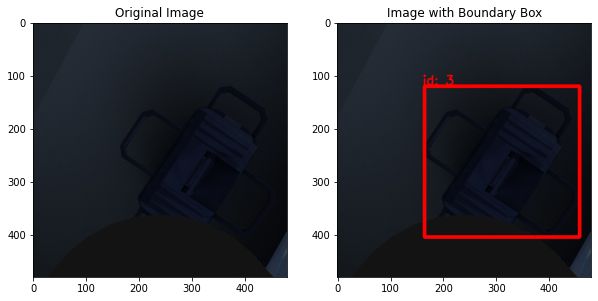

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


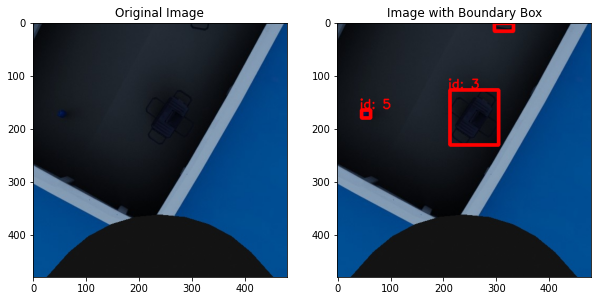

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


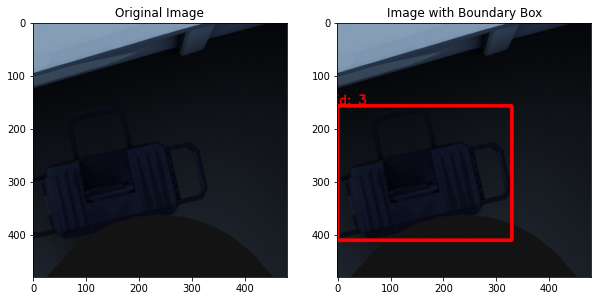

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


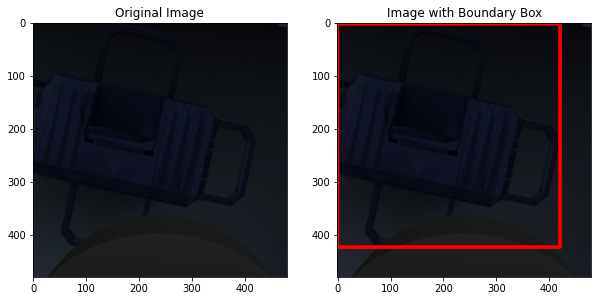

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


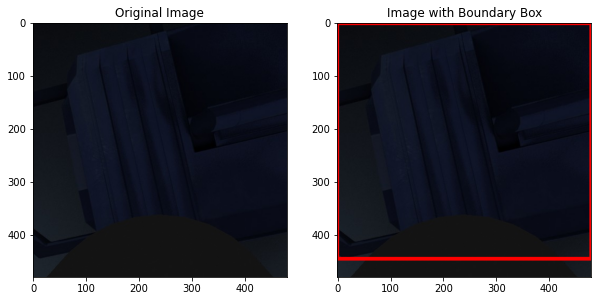

In [271]:
# DIR_TRAIN 
DIR_TRAIN = "data"

# Convert data
df_ = convert_data(DIR_TRAIN)

for filename in open_folder(DIR_TRAIN): 
    if "jpg" in filename: 
        plot_img(df_, filename)

    

In [270]:
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.8
color = (255, 0, 0)
thickness = 2


def plot_img(df, image_name):
    
    fig, ax = plt.subplots(1, 2, figsize = (10, 10))
    ax = ax.flatten()
    records = df[df['image_id'] == image_name]
    img_path = os.path.join(os.getcwd(), DIR_TRAIN, image_name)

    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image2 = image
    
    ax[0].set_title('Original Image')
    ax[0].imshow(image)
    
    for idx, row in records.iterrows():
        box = row[['x', 'y', 'w', 'h']].values
        class_id = row['id']
        xmin = box[0]
        ymin = box[1]
        width = box[2]
        height = box[3]
        
        cv2.rectangle(image2, (int(xmin),int(ymin)), (int(xmin + width),int(ymin + height)), (255,0,0), 5)
        cv2.putText(image, 'id: {}'.format(class_id), (xmin-3, ymin-3), font, fontScale, color, thickness)
    
    ax[1].set_title('Image with Boundary Box')
    ax[1].imshow(image2)

    plt.show()